In [6]:
# Install a pip package in case not available in the current Jupyter kernel
import sys
!{sys.executable} -m pip install numpy pandas opencv-python matplotlib

     |████████████████████████████████| 10.3 MB 16 kB/s  eta 0:00:01
     |████████████████████████████████| 1.2 MB 98 kB/s  eta 0:00:01


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as matplot
%matplotlib inline
import math
import cv2 as cv

## Verifying Benford's law by plotting MSD of naturally occurring statistics

For datasets, we analyze for country-wise population in *population_by_country_2020.csv* which is a dataset containing population of all countries of world. We also analyze number of likes in comments in *youtube_dataset.csv* which is a dataset containing information about comments on popular videos.

In [21]:
population_dataset = pd.read_csv('population_by_country_2020.csv')
population_dataset.head()

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1440297825,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1382345085,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,331341050,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,274021604,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,221612785,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %


In [22]:
comment_likes_dataset = pd.read_csv('youtube_dataset.csv')
comment_likes_dataset.head()

,Video Name,Channel Name,Comment Id,User Name,Comment,Date,Likes
0,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgwV0tapZzaFxdYm1z14AaABAg,GAMIT yuvraj,The people who liked this comment is officiall...,2020-08-10T20:00:43Z,98280
1,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgyiccblP3A16aixpit4AaABAg,MrCrazy,"- Wait, it's 7B views\n- Always has been",2020-09-07T20:52:36Z,773
2,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,Ugx7THW3EBNJlhJuwSB4AaABAg,60K Subs With 1 Video Challenge,*Teacher: What is the population of the Earth?...,2019-11-21T03:23:32Z,356081
3,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgzXUsI6yrRjTKNASf94AaABAg,Srivathsa D,Let's be honest this wasn't your recommendatio...,2020-09-09T03:41:34Z,13
4,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgxCu6mywg6uqjueHQ14AaABAg,1k Subscribers Challenge Without Any Video,Types Of People:\n10% Enjoying Song \n90% Chec...,2020-09-08T09:53:24Z,122


In [34]:
# Computes ideal distribution following Benford's law
def benfordDataset(dataset_size):
    dataset = []
    sum_prob = 0
    for x in range(1, 10):
        sum_prob += math.log(1+1/x)
    for x in range(1,10):
        freq = dataset_size*(math.log(1+1/x))/sum_prob
        dataset.append(freq)
    return dataset

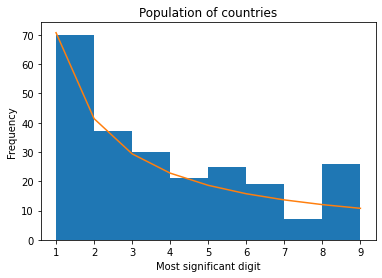

In [35]:
# Extracting NumPy array from the population field in the csv file
population_list = np.array(population_dataset['Population (2020)'])
dataset_size = population_list.shape[0]
msd_list = []
for x in population_list:
  msd_list.append(int(str(x)[0]))
np.sort(msd_list)
dig_list = [1,2,3,4,5,6,7,8,9]

# Plotting the graph
matplot.hist(msd_list, dig_list, density=False)
matplot.plot(dig_list, benfordDataset(dataset_size))
matplot.title('Population of countries')
matplot.xlabel('Most significant digit')
matplot.ylabel('Frequency')
matplot.show()

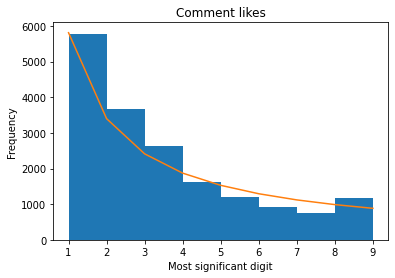

In [36]:
# Extracting NumPy array from the likes field in the csv file
likes_list = np.array(comment_likes_dataset['Likes'])
dataset_size = likes_list.shape[0]
msd_list = []
for x in likes_list:
    digit = int(str(x)[0])
    # Ignoring 0 values
    if (digit != 0):
        msd_list.append(digit)
np.sort(msd_list)
matplot.hist(msd_list, dig_list, density=False)
matplot.plot(dig_list, benfordDataset(dataset_size))
matplot.title('Comment likes')
matplot.xlabel('Most significant digit')
matplot.ylabel('Frequency')
matplot.show()

We now analyze two images, natural.jpg and synthetic.jpg. In specific, we extract their RGB values and flatten into 1D array for plots.

In [15]:
nat_img = cv.imread('natural.jpg')
synthetic_img = cv.imread('synthetic.jpg')

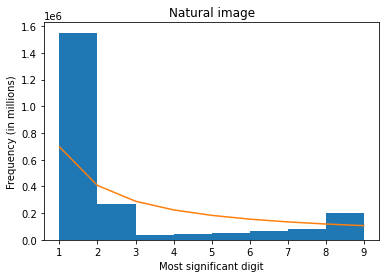

In [37]:
# Extracting BGR values from natural.jpg
nat_img_1d = nat_img.flatten()
dataset_size = nat_img_1d.shape[0]
msd_list = []
for x in nat_img_1d:
    digit = int(str(x)[0])
    # Ignoring 0 values
    if (x != 0):
        msd_list.append(digit)
np.sort(msd_list)
matplot.hist(msd_list, dig_list, density=False)
matplot.plot(dig_list, benfordDataset(dataset_size))
matplot.title('Natural image')
matplot.xlabel('Most significant digit')
matplot.ylabel('Frequency (in millions)')
matplot.show()

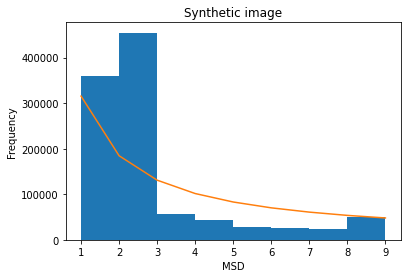

In [38]:
# Extracting BGR values from synthetic.jpg
synthetic_img_1d = synthetic_img.flatten()
dataset_size = synthetic_img_1d.shape[0]
msd_list = []
for x in synthetic_img_1d:
    digit = int(str(x)[0])
    # Ignoring 0 values
    if (x != 0):
        msd_list.append(digit)
np.sort(msd_list)
matplot.hist(msd_list, dig_list, density=False)
matplot.plot(dig_list, benfordDataset(dataset_size))
matplot.title('Synthetic image')
matplot.xlabel('MSD')
matplot.ylabel('Frequency')
matplot.show()